In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import collections
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from ipywidgets import Image
from io import StringIO
import pydotplus #pip install pydotplus
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [7]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition


In [8]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Dataset UCI Adult: classify people using demographical data - whether they earn more than $50,000 per year or not.

- **Age** – continuous feature
- **Workclass** –  continuous feature
- **fnlwgt** – final weight of object, continuous feature
- **Education** –  categorical feature
- **Education_Num** – number of years of education, continuous feature
- **Martial_Status** –  categorical feature
- **Occupation** –  categorical feature
- **Relationship** – categorical feature
- **Race** – categorical feature
- **Sex** – categorical feature
- **Capital_Gain** – continuous feature
- **Capital_Loss** – continuous feature
- **Hours_per_week** – continuous feature
- **Country** – categorical feature

**1-Скачали датасет и загрузили его в фрейм данных**

In [9]:
data = pd.read_csv("/content/adult.data.csv")
data.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


**2-Смотрим статичтическую информацию о данных**

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**4 - Смотрим название колонок. Строки мы посмотрели, вызвав метод .head() выше**

In [12]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [13]:
data.shape

(32561, 15)

In [14]:
data['salary'].value_counts()

,count
salary,
<=50K,24720
>50K,7841


**5 - Сначала визуализируем данные**

In [ ]:
#numerical_columns
features1 = list(set(data.columns) - set(['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'salary']))

data[features1].hist(figsize=(15,12));
###############################################################################
#categorical_columns
features2 = list(set(data.columns) - set(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']))

for feature in features2:
    plt.figure(figsize=(20, 6))
    sns.countplot(x=data[feature])
    plt.xticks(rotation=45, ha='right')
###############################################################################
sns.countplot(data=data, x="salary", hue='education')
###############################################################################
sns.histplot(data, x="salary", hue="relationship", multiple="stack")
###############################################################################
sns.boxplot(data=data, y='age', x='salary');
###############################################################################
sns.violinplot(x='salary', y='age', data=data)
###############################################################################
sns.lineplot(data=data, x='age', y='relationship');
###############################################################################
sns.pairplot(data, kind="scatter", hue="salary");
###############################################################################
sns.heatmap(data.corr(numeric_only = True));
###############################################################################

Закодируем таргет и удалим его из исходного датасета

In [15]:
data['salary'] = data['salary'].apply(lambda x: 0 if x == "<=50K" else 1)
y = data.pop('salary')

Заменим категориальные данные количественными. Сначала делаем проверку и записываем

In [16]:
categorical_columns = [
    c for c in data.columns if data[c].dtype.name == "object"
]
numerical_columns = [
    c for c in data.columns if data[c].dtype.name != "object"
]

print("categorical_columns:", categorical_columns)
print("numerical_columns:", numerical_columns)

categorical_columns: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
numerical_columns: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


Применим get_dummies

In [17]:
df = pd.concat(
    [data[numerical_columns], pd.get_dummies(data[categorical_columns])],
    axis=1,
)

Нормализуем

In [18]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

Делим на обучающую и тестовую - 70/30

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    df_scaled, y, test_size=0.3, random_state=17, stratify=y
)

Далее попробуем следующие алгоритмы:

Logistic Regression (логистическая регрессия)
Random Forest (случайный лес)
Support Vector Machine (машина опорных векторов, SVM)
K-Nearest Neighbors (k ближайших соседей, KNN)
Gradient Boosting (градиентный бустинг)

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [21]:
models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "GradientBoosting": GradientBoostingClassifier()
}

In [22]:
param_grid = {
    "LogisticRegression":
     {"C": [0.1, 1, 10], "penalty": ["l2"], "solver": ["lbfgs"]},
    "RandomForest":
     {"n_estimators": [100, 200], "max_depth": [10, 20, None], "min_samples_split": [2, 5]},
    "SVM":
     {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    "KNN":
     {"n_neighbors": [3, 5, 7], "weights": ["uniform", "distance"]},
    "GradientBoosting":
     {"n_estimators": [100, 200], "learning_rate": [0.01, 0.1, 0.2], "max_depth": [3, 5]}
}

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

Training LogisticRegression...
Best parameters for LogisticRegression: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy for LogisticRegression: 0.8545
Precision for LogisticRegression: 0.7416
Recall for LogisticRegression: 0.6076
F1 Score for LogisticRegression: 0.6679
------------------------------
Training RandomForest...
Best parameters for RandomForest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy for RandomForest: 0.8613
Precision for RandomForest: 0.7726
Recall for RandomForest: 0.6008
F1 Score for RandomForest: 0.6759
------------------------------
Training SVM...
Best parameters for SVM: {'C': 10, 'kernel': 'linear'}
Accuracy for SVM: 0.8517
Precision for SVM: 0.7482
Recall for SVM: 0.5787
F1 Score for SVM: 0.6526
------------------------------
Training KNN...
Best parameters for KNN: {'n_neighbors': 7, 'weights': 'uniform'}
Accuracy for KNN: 0.8324
Precision for KNN: 0.6692
Recall for KNN: 0.6012
F1 Score for KNN: 0.6334
-----------------------

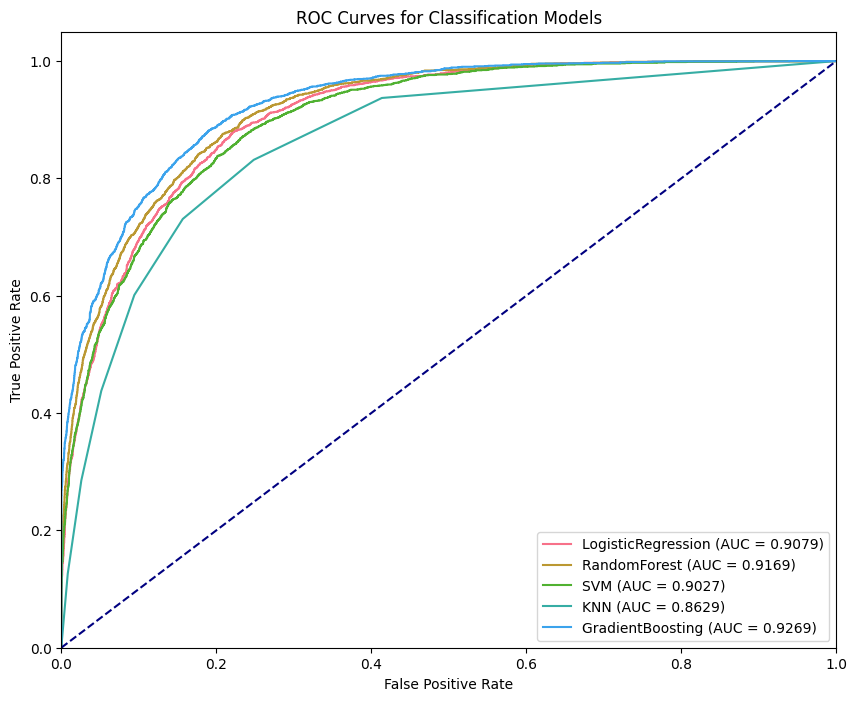

In [27]:
best_models = {}
for name, model in models.items():
    print(f"Training {name}...")
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring="accuracy", n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_models[name] = best_model

    # Предсказания и оценка на тестовой выборке
    y_pred = best_model.predict(X_test)

    # Выводим метрики
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Accuracy for {name}: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision for {name}: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall for {name}: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score for {name}: {f1_score(y_test, y_pred):.4f}")
    print("-" * 30)
    # Рассчитываем вероятности для построения ROC-кривой
    if hasattr(best_model, "predict_proba"):
        y_proba = best_model.predict_proba(X_test)[:, 1]
    else:  # Для SVM используем decision_function
        y_proba = best_model.decision_function(X_test)

    # Построение ROC-кривой
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

# Настройка графика ROC-кривых
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Classification Models')
plt.legend(loc="lower right")
plt.show()

Наилучшая модель градиентный бустинг, по всем метрикам.